In [1]:
#pip install fitter

In [86]:
# calculate residual errors for a persistence forecast model
import pandas as pd
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import rv_continuous, burr, laplace_asymmetric, nct
from scipy.special import gamma
from statsmodels.tsa.stattools import adfuller
import pickle, time, os, sys
# imports the fitter function and produces estimated fits for our residuals
from fitter import Fitter

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

from statsmodels.distributions.copula.api import FrankCopula, CopulaDistribution
from scipy import stats
import numpy as np
from tqdm import tqdm

In [2]:
import statsmodels
statsmodels.__version__

'0.14.0'

In [3]:
try:
    import statsmodels
except:
    pip install -U statsmodels

In [12]:
#series.to_csv("financial_metrics.csv", index = False)
series = pd.read_csv('financial_metrics.csv')

In [27]:
series.shape

(97, 6)

In [60]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [61]:
adf_test(series.stock)

Results of Dickey-Fuller Test:
Test Statistic                -9.615096e+00
p-value                        1.769100e-16
#Lags Used                     0.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64


In [62]:
adf_test(series.bond)

Results of Dickey-Fuller Test:
Test Statistic                 -3.103980
p-value                         0.026260
#Lags Used                      3.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


# fit individual distribution

In [24]:
#fit 109 distribution and return error
stock_f = Fitter(series.stock)
stock_f.fit()

SKIPPED _fit distribution (taking more than 100 seconds)
SKIPPED loguniform distribution (taking more than 100 seconds)
SKIPPED reciprocal distribution (taking more than 100 seconds)
SKIPPED rv_continuous distribution (taking more than 100 seconds)
SKIPPED rv_histogram distribution (taking more than 100 seconds)
SKIPPED studentized_range distribution (taking more than 100 seconds)


In [26]:
len(stock_f.distributions)

110

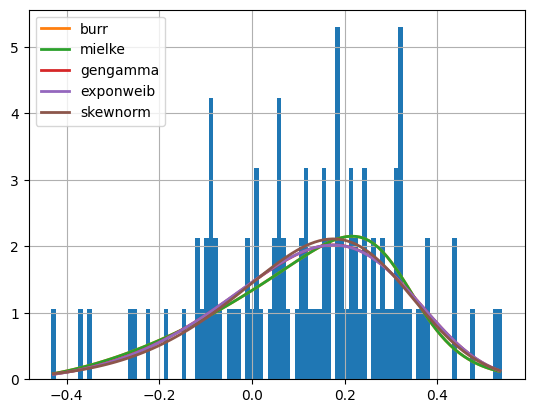

In [27]:
stock_summary = stock_f.summary()

In [14]:
stock_summary.index

Index(['burr', 'mielke', 'gengamma', 'exponweib', 'skewnorm'], dtype='object')

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,102.755475,70.709123,81.007967,inf,0.048521,0.967978
mielke,102.755479,70.709318,81.008161,inf,0.048521,0.967978
gengamma,103.120993,70.033347,80.332191,inf,0.041414,0.993959
exponweib,103.134452,70.339832,80.638676,inf,0.040947,0.994758
skewnorm,103.239306,73.497645,81.221777,inf,0.043629,0.988875


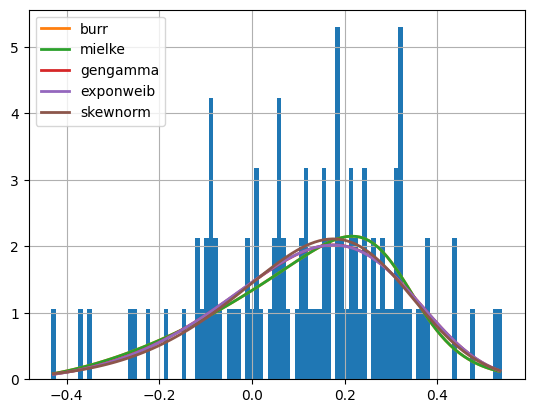

In [34]:
stock_5 = Fitter(series.stock, distributions= list(stock_summary.index))
stock_5.fit()
stock_5.summary()

In [15]:
stock_top5_par_dict = {}
for i in stock_summary.index:
    '''get parameters of top 5 distribution for stock'''
    par_i = stock_f.fitted_param[i]
    print(f"{i}: {par_i}")
    stock_top5_par_dict[i] = par_i

burr: (14.976934520079752, 0.18814874217017674, -0.5489248312197489, 0.8847058519684361)
mielke: (2.817897921124711, 14.976918677251719, -0.548925520971917, 0.884705720041796)
gengamma: (0.6367718067262966, 6.16408498490866, -0.6603238123668429, 0.9443431645292288)
exponweib: (0.6907701373122621, 5.898930298204084, -0.6756532402352456, 0.9265316201027394)
skewnorm: (-2.0863331446550477, 0.3251596365291939, 0.2841284146062046)


# fit bond distribution

In [16]:
#fit 109 distribution and return error
bond_f = Fitter(series.bond)
bond_f.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)


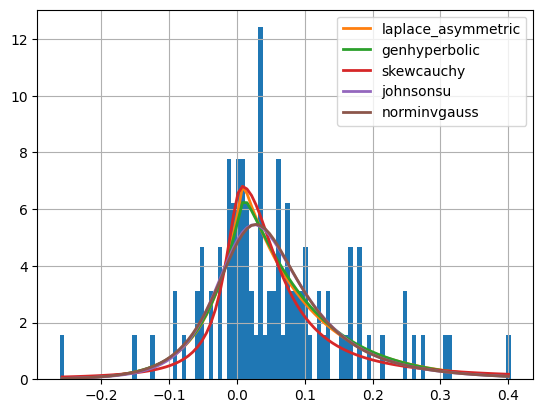

In [17]:
bond_summary = bond_f.summary()

In [18]:
bond_top5_par_dict = {}
for i in bond_summary.index:
    '''get parameters of top 5 distribution for bond'''
    par_i = bond_f.fitted_param[i]
    print(f"{i}: {par_i}")
    bond_top5_par_dict[i] = par_i

laplace_asymmetric: (0.7122967970189089, 0.009328090401905449, 0.06805937615899749)
genhyperbolic: (1.1203771012235704, 8.263486788480682e-05, 2.552418708583975e-05, 0.009914825145612517, 5.013220732999252e-06)
skewcauchy: (0.37432183114034046, 0.007264640837457528, 0.04677085859944343)
johnsonsu: (-0.5856495059269391, 1.2477677943498862, 0.0007484818970035647, 0.08542947106544782)
norminvgauss: (0.903628639670037, 0.38956343472253174, 0.014725113308406063, 0.0872423458908265)


# fit inflation distribution

In [19]:
#fit 109 distribution and return error
inflation_f = Fitter(series.inflation)
inflation_f.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


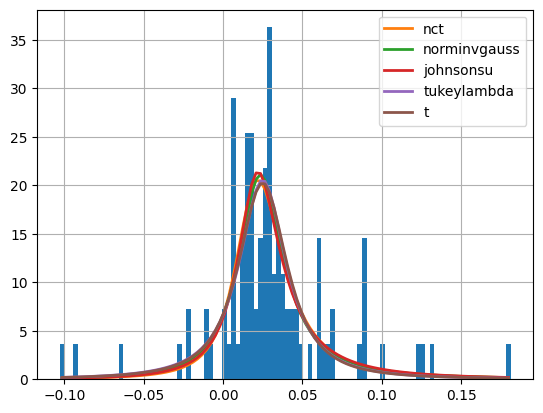

In [20]:
inflation_summary = inflation_f.summary()

In [21]:
inflation_top5_par_dict = {}
for i in inflation_summary.index:
    '''get parameters of top 5 distribution for inflation'''
    par_i = inflation_f.fitted_param[i]
    print(f"{i}: {par_i}")
    inflation_top5_par_dict[i] = par_i

nct: (1.634810887887318, 0.4969406898747222, 0.0162491457053442, 0.016409760249153325)
norminvgauss: (0.19401509051886418, 0.07507107149920203, 0.0228835736873295, 0.01726831940237375)
johnsonsu: (-0.293321001030674, 0.7928770585124951, 0.020023171719226702, 0.014389427676425868)
tukeylambda: (-0.4885705013772679, 0.024986302842373832, 0.008670757490570103)
t: (1.6277445689896632, 0.025031692914076607, 0.01700886819462977)


# fit dividend distribution

In [25]:
series.head()

,stock,bond,inflation,year,dividend,income
0,0.116239,0.077694,-0.011173,1926,0.054073,0.037276
1,0.374885,0.089279,-0.022599,1927,0.057081,0.034088
2,0.436084,0.001039,-0.011561,1928,0.048130,0.032172
3,-0.084153,0.034213,0.005848,1929,0.039835,0.034743
4,-0.248970,0.046584,-0.063954,1930,0.045688,0.033248


In [26]:
#fit 109 distribution and return error
divident_f = Fitter(series.dividend)
divident_f.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


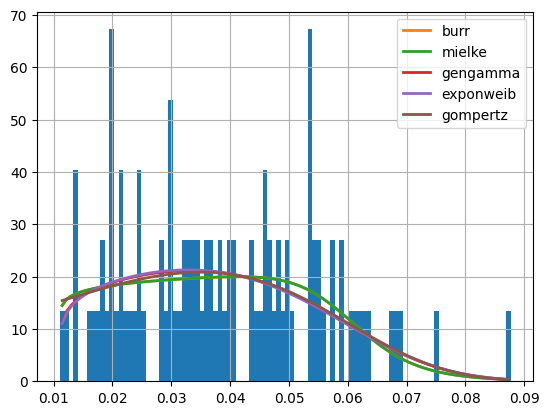

In [27]:
div_summmary = divident_f.summary()

In [28]:
dividend_top5_par_dict = {}
for i in div_summmary.index:
    '''get parameters of top 5 distribution for dividend'''
    par_i = divident_f.fitted_param[i]
    print(f"{i}: {par_i}")
    dividend_top5_par_dict[i] = par_i

burr: (9.318562184665453, 0.11565827165986413, 0.011005456579740667, 0.051361008989308315)
mielke: (1.0777664837301704, 9.318600339627466, 0.0110054567919716, 0.051361059214462934)
gengamma: (0.3183222500479551, 3.698849361878734, 0.010913176779049459, 0.05124353566243307)
exponweib: (0.35548715028313316, 3.356380011641251, 0.010895741610598213, 0.04592768434123097)
gompertz: (0.4040872075438151, 0.011057595747605176, 0.026437173399833834)


# fit bond income distribution

In [29]:
#fit 109 distribution and return error
income_f = Fitter(series.income)
income_f.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)


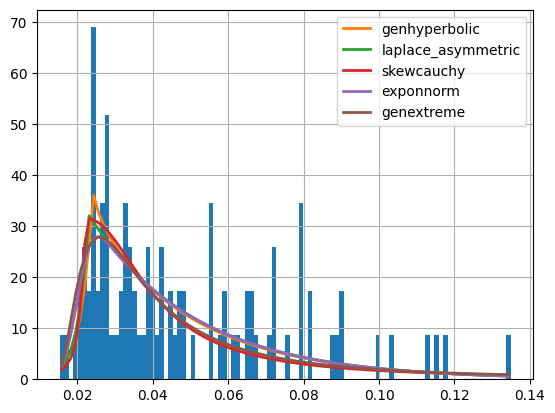

In [30]:
income_summmary = income_f.summary()

In [31]:
income_top5_par_dict = {}
for i in income_summmary.index:
    '''get parameters of top 5 distribution for dividend'''
    par_i = income_f.fitted_param[i]
    print(f"{i}: {par_i}")
    income_top5_par_dict[i] = par_i

genhyperbolic: (0.9087698687934324, 1.931186062853646e-05, 1.552609400420811e-05, 0.02399531948564209, 1.1446516683063608e-07)
laplace_asymmetric: (0.31288177862513294, 0.022976034479012586, 0.00885650468421982)
skewcauchy: (0.8299969602807649, 0.022670853050789537, 0.010130035922938378)
exponnorm: (9.478861158023282, 0.02010934655558022, 0.0029953476841618506)
genextreme: (-0.6562713475745107, 0.03263899478908949, 0.015803547534292844)


In [79]:
(stock_top5_par_dict, bond_top5_par_dict, inflation_top5_par_dict, dividend_top5_par_dict, income_top5_par_dict) \
            = pickle.load(open("fit_parameters_top5.pkl", "rb"))

In [143]:
# pickle.dump((stock_top5_par_dict, bond_top5_par_dict, inflation_top5_par_dict, dividend_top5_par_dict, income_top5_par_dict), 
#             open("fit_parameters_top5.pkl", "wb"))

# get top 3 marginal distributions

In [16]:
def gen_dist_obj(dist, index):
    return f"stats.{list(dist.keys())[index]}{list(dist.values())[index]}"

In [17]:
stock_gen = [exec(f"stats.{list(stock_top5_par_dict.keys())[0]}{list(stock_top5_par_dict.values())[0]}"),
             exec(f"stats.{list(stock_top5_par_dict.keys())[1]}{list(stock_top5_par_dict.values())[1]}"),
             exec(f"stats.{list(stock_top5_par_dict.keys())[2]}{list(stock_top5_par_dict.values())[2]}")]

In [18]:
bond_gen = [exec(f"stats.{list(bond_top5_par_dict.keys())[0]}{list(bond_top5_par_dict.values())[0]}"),
            exec(f"stats.{list(bond_top5_par_dict.keys())[1]}{list(bond_top5_par_dict.values())[1]}"),
            exec(f"stats.{list(bond_top5_par_dict.keys())[2]}{list(bond_top5_par_dict.values())[2]}")]

In [19]:
inflation_gen = [exec(f"stats.{list(inflation_top5_par_dict.keys())[0]}{list(inflation_top5_par_dict.values())[0]}"),
                 exec(f"stats.{list(inflation_top5_par_dict.keys())[1]}{list(inflation_top5_par_dict.values())[1]}"),
                 exec(f"stats.{list(inflation_top5_par_dict.keys())[2]}{list(inflation_top5_par_dict.values())[2]}")]

In [20]:
dividend_gen = [exec(f"stats.{list(dividend_top5_par_dict.keys())[0]}{list(dividend_top5_par_dict.values())[0]}"),
                exec(f"stats.{list(dividend_top5_par_dict.keys())[1]}{list(dividend_top5_par_dict.values())[1]}"),
                exec(f"stats.{list(dividend_top5_par_dict.keys())[2]}{list(dividend_top5_par_dict.values())[2]}")]

In [21]:
income_gen = [exec(f"stats.{list(income_top5_par_dict.keys())[0]}{list(income_top5_par_dict.values())[0]}"),
              exec(f"stats.{list(income_top5_par_dict.keys())[1]}{list(income_top5_par_dict.values())[1]}"),
              exec(f"stats.{list(income_top5_par_dict.keys())[2]}{list(income_top5_par_dict.values())[2]}")]

In [23]:
marginal_dict = {}
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                for m in range(3):
                    marginal_dict[f"{i}_{j}_{k}_{l}_{m}"] = ",".join([gen_dist_obj(stock_top5_par_dict, i), 
                                        gen_dist_obj(bond_top5_par_dict, j),
                                        gen_dist_obj(inflation_top5_par_dict, k),
                                        gen_dist_obj(dividend_top5_par_dict, l), 
                                        gen_dist_obj(income_top5_par_dict, m)])                    

In [24]:
len(marginal_dict)

243

In [153]:
pickle.dump(marginal_dict, open("marginal_dict_5.pkl", "wb"))

In [77]:
marginal_dict = pickle.load(open("marginal_dict_5.pkl", "rb"))

# Tail-Balanced FrankCoupla

In [67]:
series_ = series.drop("year", axis = 1)
series_.head()

,stock,bond,inflation,dividend,income
0,0.116239,0.077694,-0.011173,0.054073,0.037276
1,0.374885,0.089279,-0.022599,0.057081,0.034088
2,0.436084,0.001039,-0.011561,0.048130,0.032172
3,-0.084153,0.034213,0.005848,0.039835,0.034743
4,-0.248970,0.046584,-0.063954,0.045688,0.033248


In [68]:
#initialize theta value from observed data
fc = FrankCopula()
_theta = fc.fit_corr_param(series_)
_theta

0.06572448838220812

# select distribution for Copula w/ minimal sum of 5 KS statistics

In [28]:
ks_stat_sum_dict = {}
for i in tqdm(list(marginal_dict.keys())):
    fc_copula=FrankCopula(theta=_theta, k_dim=5)          
    marginals = marginal_dict.get(i)
    exec(f"joint_dist = CopulaDistribution(copula=fc_copula, marginals=[{marginals}])")    
    fc_spl_i = joint_dist.rvs(2000, random_state = 1234)
    
    ks_stat_sum = 0
    for j in range(series_.shape[1]):
        ks_stat_sum += stats.kstest(series_.iloc[:,j], fc_spl_i[:,j]).statistic
    
    ks_stat_sum_dict[i] = ks_stat_sum  

100%|██████████████████████████████████████| 243/243 [7:58:44<00:00, 118.21s/it]


In [29]:
pickle.dump(ks_stat_sum_dict, open("ks_stat_sum_dict.pkl", "wb"))

In [73]:
ks_stat_sum_dict = pickle.load(open("ks_stat_sum_dict.pkl", "rb"))

In [74]:
best_marginals = min(ks_stat_sum_dict, key = ks_stat_sum_dict.get)
best_marginals #'2_0_0_0_1'

'2_0_0_0_1'

In [75]:
bst_marg_lst = [int(i) for i in best_marginals.split("_")]
bst_marg_lst #[2, 0, 0, 0, 1]

[2, 0, 0, 0, 1]

In [80]:
print("The best stock distribution is ", list(stock_top5_par_dict.keys())[bst_marg_lst[0]])
print("The best bond distribution is ", list(bond_top5_par_dict.keys())[bst_marg_lst[1]])
print("The best inflation distribution is ", list(inflation_top5_par_dict.keys())[bst_marg_lst[2]])
print("The best dividend distribution is ", list(dividend_top5_par_dict.keys())[bst_marg_lst[3]])
print("The best bond income distribution is ", list(income_top5_par_dict.keys())[bst_marg_lst[4]])

The best stock distribution is  gengamma
The best bond distribution is  laplace_asymmetric
The best inflation distribution is  nct
The best dividend distribution is  burr
The best bond income distribution is  laplace_asymmetric


In [81]:
marginal_dict.get(best_marginals)

'stats.gengamma(0.6367718067262966, 6.16408498490866, -0.6603238123668429, 0.9443431645292288),stats.laplace_asymmetric(0.7122967970189089, 0.009328090401905449, 0.06805937615899749),stats.nct(1.634810887887318, 0.4969406898747222, 0.0162491457053442, 0.016409760249153325),stats.burr(9.318562184665453, 0.11565827165986413, 0.011005456579740667, 0.051361008989308315),stats.laplace_asymmetric(0.31288177862513294, 0.022976034479012586, 0.00885650468421982)'

# Fine-tune theta for Frank Copula

In [30]:
%%time

diff_dict = {}
for theta in tqdm(np.arange(0.01, 0.5, 0.01)): #test np.arange(0.1, 10, 0.1)
    
    fc_copula = FrankCopula(theta=theta, k_dim=5)
    marginals = marginal_dict.get(best_marginals)
    exec(f"joint_dist = CopulaDistribution(copula=fc_copula, marginals=[{marginals}])")    
    
    abs_sum = []
    for seed in range(5):
        fc_sample = joint_dist.rvs(2000, random_state = seed)
        abs_sum.append(abs(np.corrcoef(fc_sample, rowvar = False) - \
                           np.corrcoef(series_, rowvar = False)).sum())
        
    diff_dict[theta] = np.mean(abs_sum) 
    

100%|███████████████████████████████████████████| 49/49 [00:18<00:00,  2.66it/s]

CPU times: user 53.3 s, sys: 1.75 s, total: 55.1 s
Wall time: 18.4 s


In [71]:
best_theta = min(diff_dict, key =  diff_dict.get)
best_theta

0.26

In [33]:
pickle.dump(diff_dict, open("coef_diff_5.pkl", "wb"))

In [69]:
diff_dict = pickle.load(open("coef_diff_5.pkl", "rb"))

In [83]:
marginals = marginal_dict.get(best_marginals)
marginals

'stats.gengamma(0.6367718067262966, 6.16408498490866, -0.6603238123668429, 0.9443431645292288),stats.laplace_asymmetric(0.7122967970189089, 0.009328090401905449, 0.06805937615899749),stats.nct(1.634810887887318, 0.4969406898747222, 0.0162491457053442, 0.016409760249153325),stats.burr(9.318562184665453, 0.11565827165986413, 0.011005456579740667, 0.051361008989308315),stats.laplace_asymmetric(0.31288177862513294, 0.022976034479012586, 0.00885650468421982)'

# get 4M samples

In [87]:
%%time

fc_copula_best = FrankCopula(theta=best_theta, k_dim=5)
exec(f"joint_dist_best = CopulaDistribution(copula=fc_copula_best, marginals=[{marginals}])") 
fc_sample_best = joint_dist_best.rvs(4000000, random_state = 1234)

CPU times: user 2min 4s, sys: 2.31 s, total: 2min 6s
Wall time: 2min 6s


In [88]:
# load best sim output into df
best_sim = pd.DataFrame(fc_sample_best, columns = ["Stock", "Bond", "Inflation", "Dividend", "Income"])

In [89]:
print(best_sim.shape)
best_sim.head()

(4000000, 5)


,Stock,Bond,Inflation,Dividend,Income
0,0.456552,0.011318,0.076141,0.024544,0.030098
1,-0.141053,-0.011505,0.015242,0.067185,0.028081
2,0.088633,0.052650,0.056096,0.056366,0.049691
3,0.200431,0.088224,0.009449,0.020090,0.074950
4,-0.224537,0.071728,0.033733,0.041999,0.021551


In [90]:
pickle.dump(best_sim, open("best_sim_df.pkl", "wb"))

In [66]:
best_sim = pickle.load(open("best_sim_df.pkl", "rb"))

# Scenario tests

In [91]:
#read RMD
rmd = pd.read_csv("RMD.csv")

In [92]:
rmd.head()

,Age,RMD
0,62,0.0272
1,63,0.0279
2,64,0.0287
3,65,0.0295
4,66,0.0303


In [93]:
#no growth, all cash in hand, solely follow RMD % withdrawal
def method_1(org_amt, start_age, end_age, stock_bond_sim_df, stock_weight, bond_weight, withdrawal_rate = None):
    
    global rmd
    
    balance = [] 
    withdrawal = [] 
    org_left = org_amt

    rmd_sub = rmd.loc[(rmd.Age >= start_age) & (rmd.Age <= end_age)]
    rmd_sub.index = list(range(start_age, end_age+1))

    for i in range(start_age, end_age+1):

        if i == start_age:
            '''withdraw RMD % initial balance at the beginning of retirement year'''
            withdrawal.append(org_left * rmd_sub.RMD[i]) 
            org_left =  org_left * (1-rmd_sub.RMD[i])            
            balance.append(org_left) 

        else:            
            '''for the other years, the left balance will grow with total bond return and total stock return for a year
            before withdrawal next year'''            
            grow_left =  org_left * (1 + bond_weight * (stock_bond_sim_df.Bond[i]) +  \
                                         stock_weight * (stock_bond_sim_df.Stock[i]))
            
            withdrawal_ = grow_left * rmd_sub.RMD[i]
            #org_left = grow_left - withdrawal_            
            
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_)     


    return balance, withdrawal

In [94]:
def method_2(org_amt, start_age, end_age, stock_bond_sim_df, stock_weight, bond_weight, withdrawal_rate = None):
    
    global rmd
    
    balance = [] 
    withdrawal = [] 
    org_left = org_amt

    rmd_sub = rmd.loc[(rmd.Age >= start_age) & (rmd.Age <= end_age)]
    rmd_sub.index = list(range(start_age, end_age+1))

    for i in range(start_age, end_age+1):
        
        if i == start_age:
            '''withdraw RMD % initial balance at the retirement moment''' 
            withdrawal_ = org_left * (rmd_sub.RMD[i] \
                           + stock_weight * stock_bond_sim_df.Dividend[i] \
                                 + bond_weight * stock_bond_sim_df.Income[i])
            
            withdrawal.append(withdrawal_)
            
            org_left =  (org_left - withdrawal_)                   
            balance.append(org_left)              

        else:            
            '''for the following years, the left balance will grow with total bond and total stock 
            returns before withdrawal next year'''            
            grow_left =  org_left * (1 + bond_weight * stock_bond_sim_df.Bond[i] \
                                   + stock_weight * stock_bond_sim_df.Stock[i])

            withdrawal_ = grow_left * rmd_sub.RMD[i] \
                          + org_left * (stock_weight * stock_bond_sim_df.Dividend[i] \
                                      + bond_weight * stock_bond_sim_df.Income[i])  
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_)             

    return balance, withdrawal

In [95]:
def method_3(org_amt, start_age, end_age, stock_bond_sim_df, stock_weight, bond_weight, withdrawal_rate = 0.04):
    
    '''withdraw a fixed 4% of original amount plus adjustement of inflation'''  
    global rmd
    
    withdrawal = []
    balance = [] 
    org_left = org_amt

    rmd_sub = rmd.loc[(rmd.Age >= start_age) & (rmd.Age <= end_age)]
    rmd_sub.index = list(range(start_age, end_age+1))
    for i in range(start_age, end_age+1):        
        if i == start_age:

            '''withdraw 4% initial balance at the retirement moment'''      
            withdrawal_ = org_left * withdrawal_rate
            org_left =  org_left * (1-withdrawal_rate)   
            balance.append(org_left)
            withdrawal.append(withdrawal_)

        else:
            '''apply cumulated inflation rate on top of 4% withdrwal'''            
            withdrawal_ = withdrawal_ * (1 + stock_bond_sim_df.Inflation[i])
            
            grow_left = org_left * (1 + bond_weight * (stock_bond_sim_df.Bond[i])  \
                                 + stock_weight * (stock_bond_sim_df.Stock[i]))
            
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_)        

    return balance, withdrawal   
   

In [96]:
def method_4(org_amt, start_age, end_age, stock_bond_sim_df, stock_weight, bond_weight, withdrawal_rate = 0.04):
    
    '''with fixed 4% annual withdrawal of previous year amount with adjustement of inflation and investment growth'''  
    global rmd
    
    withdrawal = [] 
    balance = [] 
    org_left = org_amt

    rmd_sub = rmd.loc[(rmd.Age >= start_age) & (rmd.Age <= end_age)]
    rmd_sub.index = list(range(start_age, end_age+1))

    for i in range(start_age, end_age+1):        
        if i == start_age:
            '''withdraw 4% initial balance at the retirement moment'''  
            withdrawal.append(org_left * withdrawal_rate)
            org_left =  org_left * (1-withdrawal_rate) 
            balance.append(org_left)

        elif i == start_age + 1:
            '''apply cumulated inflation rate on the 4% of last year balance''' 

            grow_left =  org_left * (1 + bond_weight * (stock_bond_sim_df.Bond[i]) \
                                  + stock_weight * (stock_bond_sim_df.Stock[i]))                                      

            cum_inflation = stock_bond_sim_df.Inflation[i] 

            withdrawal_ = grow_left * withdrawal_rate * (1 + cum_inflation)              
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_) 

        else:
            grow_left =  org_left * (1 + bond_weight * (stock_bond_sim_df.Bond[i]) \
                                  + stock_weight * (stock_bond_sim_df.Stock[i]))                                      

            cum_inflation = (1+ stock_bond_sim_df.Inflation[i]) * (1+cum_inflation) - 1
            withdrawal_ = grow_left * withdrawal_rate * (1 + cum_inflation)               
            
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_) 

    return balance, withdrawal   


In [97]:
def method_5(org_amt, start_age, end_age, stock_bond_sim_df, stock_weight, bond_weight, withdrawal_rate = 0.06):
    
    '''withdraw a fixed X% annual withdrawal of original amount plus adjustement of inflation'''  
    global rmd
    
    balance = [] 
    withdrawal = []
    org_left = org_amt

    rmd_sub = rmd.loc[(rmd.Age >= start_age) & (rmd.Age <= end_age)]
    rmd_sub.index = list(range(start_age, end_age+1))
    withdrawal_ = org_left * withdrawal_rate

    for i in range(start_age, end_age+1):        
        if i == start_age:
            '''withdraw 6% from initial balance at the retirement moment'''                  
            withdrawal.append(withdrawal_)
            org_left =  org_left * (1-withdrawal_rate)                   
            balance.append(org_left)
        else:
            '''apply cumulated inflation rate'''
            withdrawal_ = withdrawal_ * (1 + stock_bond_sim_df.Inflation[i])

            grow_left = org_left * (1 + bond_weight * (stock_bond_sim_df.Bond[i]) +  
                               stock_weight * (stock_bond_sim_df.Stock[i]))
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_) 

    return balance, withdrawal   

In [98]:
def method_6(org_amt, start_age, end_age, stock_bond_sim_df, stock_weight, bond_weight, withdrawal_rate = 0.06):
    
    '''with X% annual withdrawal of previous year amount plus adjustement of inflation and investment growth'''  
    global rmd
    
    balance = [] 
    withdrawal = []
    org_left = org_amt

    rmd_sub = rmd.loc[(rmd.Age >= start_age) & (rmd.Age <= end_age)]
    rmd_sub.index = list(range(start_age, end_age+1))

    for i in range(start_age, end_age+1):        
        if i == start_age:
            '''withdraw 6% initial balance at the retirement moment'''  
            withdrawal.append(org_left * withdrawal_rate)
            org_left =  org_left * (1-withdrawal_rate)  
            balance.append(org_left)

        elif i == start_age + 1:
            '''apply cumulated inflation rate on the 6% of the first year balance''' 

            grow_left =  org_left * (1 + bond_weight * (stock_bond_sim_df.Bond[i]) \
                                  + stock_weight * (stock_bond_sim_df.Stock[i]))                                      

            cum_inflation = stock_bond_sim_df.Inflation[i]             
            withdrawal_ = grow_left * withdrawal_rate * (1 + cum_inflation)               
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_) 
        else:            
            grow_left =  org_left * (1 + bond_weight * (stock_bond_sim_df.Bond[i]) \
                                  + stock_weight * (stock_bond_sim_df.Stock[i]))                                      

            cum_inflation = (1+ stock_bond_sim_df.Inflation[i]) * (1+cum_inflation) - 1
            
            withdrawal_ = grow_left * withdrawal_rate * (1 + cum_inflation)  
            if grow_left <= 0: 
                withdrawal.append(0)
                org_left = 0
                balance.append(0)                
            
            elif (withdrawal_ > grow_left):
                withdrawal.append(grow_left)
                org_left = 0
                balance.append(0)
                
            elif (withdrawal_ < 0):
                withdrawal.append(0)
                org_left = grow_left
                balance.append(grow_left)   
                
            else:                
                org_left = grow_left - withdrawal_
                balance.append(org_left)
                withdrawal.append(withdrawal_) 

    return balance, withdrawal

In [109]:
def sim_10K(best_fit_df, org_amt, withdrawal_rate, start_age, end_age, 
            output_balance_path, output_withdrawal_path):
    
    is_output_balance = os.path.exists(output_balance_path)
    if not is_output_balance:
        os.mkdir(is_output_balance)
        
    is_output_withdrawal = os.path.exists(output_withdrawal_path)
    if not is_output_withdrawal:
        os.mkdir(is_output_withdrawal)        
    
    print(f'org_amt = {org_amt}; withdrawal_rate = {withdrawal_rate}')
    print(f'Output pickle files is {output_balance_path} and {output_withdrawal_path}.')
    
    method_1_6_4 = {}
    method_1_7_3 = {}
    method_2_6_4 = {}
    method_2_7_3 = {}
    method_3_6_4 = {}
    method_3_7_3 = {}
    method_4_6_4 = {}
    method_4_7_3 = {}
    method_5_6_4 = {}
    method_5_7_3 = {}
    method_6_6_4 = {}
    method_6_7_3 = {}
    
    withdrawal_1_6_4 = {}
    withdrawal_1_7_3 = {}
    withdrawal_2_6_4 = {}
    withdrawal_2_7_3 = {}
    withdrawal_3_6_4 = {}
    withdrawal_3_7_3 = {}
    withdrawal_4_6_4 = {}
    withdrawal_4_7_3 = {}
    withdrawal_5_6_4 = {}
    withdrawal_5_7_3 = {}
    withdrawal_6_6_4 = {}
    withdrawal_6_7_3 = {}
    
   
    for i in tqdm(range(10000)):
        
        stock_bond_sim_df = best_fit_df.sample((end_age-start_age +1), random_state = i)
        stock_bond_sim_df.index = list(range(start_age, end_age+1))

        method_1_6_4[i], withdrawal_1_6_4[i] = method_1(org_amt,start_age, end_age, stock_bond_sim_df, 0.4, 0.6)

        method_1_7_3[i], withdrawal_1_7_3[i] = method_1(org_amt,start_age, end_age, stock_bond_sim_df, 0.3, 0.7)

        method_2_6_4[i], withdrawal_2_6_4[i]= method_2(org_amt,start_age, end_age, stock_bond_sim_df, 0.4, 0.6)

        method_2_7_3[i], withdrawal_2_7_3[i] = method_2(org_amt,start_age, end_age, stock_bond_sim_df, 0.3, 0.7)

        method_3_6_4[i], withdrawal_3_6_4[i] = method_3(org_amt,start_age, end_age, stock_bond_sim_df, 0.4, 0.6)

        method_3_7_3[i], withdrawal_3_7_3[i] = method_3(org_amt,start_age, end_age, stock_bond_sim_df, 0.3, 0.7)

        method_4_6_4[i], withdrawal_4_6_4[i] = method_4(org_amt,start_age, end_age, stock_bond_sim_df, 0.4, 0.6)

        method_4_7_3[i], withdrawal_4_7_3[i] = method_4(org_amt,start_age, end_age, stock_bond_sim_df, 0.3, 0.7)

        method_5_6_4[i], withdrawal_5_6_4[i] = method_5(org_amt,start_age, end_age, stock_bond_sim_df, 0.4, 0.6, withdrawal_rate =withdrawal_rate)

        method_5_7_3[i], withdrawal_5_7_3[i] = method_5(org_amt,start_age, end_age, stock_bond_sim_df, 0.3, 0.7, withdrawal_rate =withdrawal_rate)

        method_6_6_4[i], withdrawal_6_6_4[i] = method_6(org_amt,start_age, end_age, stock_bond_sim_df, 0.4, 0.6, withdrawal_rate =withdrawal_rate)

        method_6_7_3[i], withdrawal_6_7_3[i] = method_6(org_amt,start_age, end_age, stock_bond_sim_df, 0.3, 0.7, withdrawal_rate =withdrawal_rate)
    
    pickle.dump((method_1_6_4, method_1_7_3, 
             method_2_6_4, method_2_7_3, 
             method_3_6_4, method_3_7_3, 
             method_4_6_4, method_4_7_3, 
             method_5_6_4, method_5_7_3, 
             method_6_6_4, method_6_7_3),   
                open(f"{output_balance_path}", "wb")) 
   
    pickle.dump((withdrawal_1_6_4, withdrawal_1_7_3, 
             withdrawal_2_6_4, withdrawal_2_7_3, 
             withdrawal_3_6_4, withdrawal_3_7_3, 
             withdrawal_4_6_4, withdrawal_4_7_3, 
             withdrawal_5_6_4, withdrawal_5_7_3, 
             withdrawal_6_6_4, withdrawal_6_7_3) ,
            open(f"{output_withdrawal_path}", "wb")) 

# export to csv

In [116]:
def export_csv(input_bal_path, input_wdrl_path, output_csv_path):
    
    is_input_bal_path = os.path.exists(input_bal_path)
    if not is_input_bal_path:
        os.mkdir(input_bal_path)
    
    is_input_wdrl_path = os.path.exists(input_wdrl_path)
    if not is_input_wdrl_path:
        os.mkdir(input_wdrl_path)
    
    is_output_path = os.path.exists(output_csv_path)
    if not is_output_path:
        os.mkdir(output_csv_path)

    (bal_1_6_4, bal_1_7_3, 
             bal_2_6_4, bal_2_7_3, 
             bal_3_6_4, bal_3_7_3, 
             bal_4_6_4, bal_4_7_3, 
             bal_5_6_4, bal_5_7_3, 
             bal_6_6_4, bal_6_7_3) \
             = pickle.load(open(f"{input_bal_path}", "rb"))
    
    (wdrl_1_6_4, wdrl_1_7_3, 
             wdrl_2_6_4, wdrl_2_7_3, 
             wdrl_3_6_4, wdrl_3_7_3, 
             wdrl_4_6_4, wdrl_4_7_3, 
             wdrl_5_6_4, wdrl_5_7_3, 
             wdrl_6_6_4, wdrl_6_7_3) \
             = pickle.load(open(f"{input_wdrl_path}", "rb"))
        
    export_lst = ['bal_1_6_4', 'wdrl_1_6_4', 'bal_1_7_3', 'wdrl_1_7_3',
             'bal_2_6_4','wdrl_2_6_4', 'bal_2_7_3', 'wdrl_2_7_3',
             'bal_3_6_4', 'wdrl_3_6_4', 'bal_3_7_3', 'wdrl_3_7_3',
             'bal_4_6_4', 'wdrl_4_6_4', 'bal_4_7_3', 'wdrl_4_7_3',
             'bal_5_6_4', 'wdrl_5_6_4', 'bal_5_7_3', 'wdrl_5_7_3',
             'bal_6_6_4', 'wdrl_6_6_4', 'bal_6_7_3', 'wdrl_6_7_3']
    
    for idx, _dict in enumerate((bal_1_6_4, wdrl_1_6_4, bal_1_7_3, wdrl_1_7_3,
             bal_2_6_4,wdrl_2_6_4, bal_2_7_3, wdrl_2_7_3,
             bal_3_6_4, wdrl_3_6_4, bal_3_7_3, wdrl_3_7_3,
             bal_4_6_4, wdrl_4_6_4, bal_4_7_3, wdrl_4_7_3,
             bal_5_6_4, wdrl_5_6_4, bal_5_7_3, wdrl_5_7_3,
             bal_6_6_4, wdrl_6_6_4,bal_6_7_3, wdrl_6_7_3)):        
        
        bal_i = pd.DataFrame.from_dict(_dict, orient = "index", columns = list(range(65, 101)))
        bal_i.to_csv(f"{output_csv_path}/{export_lst[idx]}.csv", index = False)  

# run 10K simulations on General settings

In [101]:
org_amt = 255200
withdrawal_rate = 0.06
bond_weight = 0.6
stock_weight = 0.4

In [102]:
%%time

sim_10K(best_sim, 255200, 0.06, 65, 100, "./new_best_5_general_balance.pkl", "./new_best_5_general_withdrawal.pkl")

org_amt = 255200; withdrawal_rate = 0.06
Output pickle files is ./new_best_5_general_balance.pkl and ./new_best_5_general_withdrawal.pkl.


100%|███████████████████████████████████| 10000/10000 [1:11:07<00:00,  2.34it/s]


CPU times: user 1h 11min 12s, sys: 28.9 s, total: 1h 11min 41s
Wall time: 1h 12min 4s


In [110]:
export_csv("./new_best_5_general_balance.pkl", "./new_best_5_general_withdrawal.pkl",
           "./outputs/best_5_general/")

In [117]:
def merge_df(input_path, output_path):
    
    '''merge balance and withdrawal side-by-side by age'''
    # Create a new directory because it does not exist
    is_output_path = os.path.exists(output_path)
    if not is_output_path:
        os.mkdir(output_path)
    
    file_lst = os.listdir(input_path)
    file_lst.sort()
    file_lst = [i for i in file_lst if i != '.ipynb_checkpoints']
    #print(len(file_lst))
    #assert len(file_lst) == 72, "The input files # is more than 72."
    
    for i in range(int(len(file_lst)/2)):
        bal_i = pd.read_csv(f'{input_path}/{file_lst[i]}')
        wdrl_i = pd.read_csv(f'{input_path}/{file_lst[i+12]}')
    
        out_i = pd.concat([bal_i, wdrl_i], axis = 1)
        out_i.columns = ["balance" + str(i) for i in range(65, 101)] + ["withdrawal" + str(i) for i in range(65, 101)]
        out_i_col = out_i.columns
        out_i = out_i[[i for sub_i in [[out_i_col[i]] + [out_i_col[i+36]] for i in range(36)] for i in sub_i]]
        out_i.to_csv(f"{output_path}/method_{file_lst[i]}", index = False)    

In [118]:
merge_df("./outputs/best_5_general/", './outputs/best_5_general_merge/')

# Mississippi

In [ ]:
# mississippi test
org_amt = 617661
withdrawal_rate = 0.0725

In [ ]:
print(f'org_amt = {org_amt}; withdrawal_rate = {withdrawal_rate}')

In [ ]:
%%time

sim_10K(best_sim, 617661, 0.0725, 65, 100, 
        "./new_best_5_mississippi_balance.pkl", "./new_best_5_mississippi_withdrawal.pkl")

In [ ]:
export_csv("./new_best_5_mississippi_balance.pkl", "./new_best_5_mississippi_withdrawal.pkl", 
           "./outputs/best_5_mississippi/")

In [ ]:
merge_df("./outputs/best_5_mississippi", './outputs/best_5_ms_merge/')

# New Hampshire

In [ ]:
org_amt = 946850
withdrawal_rate = 0.0591

In [ ]:
print(f'org_amt = {org_amt}; withdrawal_rate = {withdrawal_rate}')

In [ ]:
%%time

sim_10K(best_sim, 946850, 0.0591, 65, 100, "./new_best_5_newhampshire_balance.pkl", 
        "./new_best_5_newhampshire_withdrawal.pkl")

In [ ]:
export_csv("./new_best_5_newhampshire_balance.pkl", "./new_best_5_newhampshire_withdrawal.pkl", 
           "./outputs/best_5_newhampshire")

In [ ]:
merge_df("./outputs/best_5_newhampshire", './outputs/best_5_nh_merge')

# concat median by age and plot

In [119]:
try:
    import plotly
except:
    !pip install -U plotly

In [120]:
try:
    import kaleido
except:
    !pip install kaleido

In [121]:
import plotly
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.default_format = "svg"

In [122]:
def prep_plot(pkl, col_name = 'method'):
    
    (method_1_6_4, method_1_7_3, 
             method_2_6_4, method_2_7_3, 
             method_3_6_4, method_3_7_3, 
             method_4_6_4, method_4_7_3, 
             method_5_6_4, method_5_7_3, 
             method_6_6_4, method_6_7_3) \
             = pickle.load(open(pkl, "rb"))   


    method_median = pd.Series(list(range(65, 101)), name = "Age")
    method_median.index = [int(j) for j in list(range(65, 101))]
    for i in tqdm((method_1_6_4, method_1_7_3, method_2_6_4, method_2_7_3, 
               method_3_6_4, method_3_7_3, method_4_6_4, method_4_7_3,    
               method_5_6_4, method_5_7_3, method_6_6_4, method_6_7_3)):
        df_i = pd.DataFrame.from_dict(i, orient = "index", columns = list(range(65, 101)))
    
        method_median = pd.concat([method_median, df_i.median(axis =0)], axis = 1)
    
    method_median.columns = ['Age',f'{col_name}_1_6_4',f'{col_name}_1_7_3', 
                             f'{col_name}_2_6_4', f'{col_name}_2_7_3', 
                             f'{col_name}_3_6_4', f'{col_name}_3_7_3', 
                             f'{col_name}_4_6_4', f'{col_name}_4_7_3',    
                             f'{col_name}_5_6_4', f'{col_name}_5_7_3', 
                             f'{col_name}_6_6_4', f'{col_name}_6_7_3']
    
    return method_median

In [123]:
withdrwal_median = prep_plot('new_best_5_general_withdrawal.pkl', col_name = 'Withdrawal')    

100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 13.21it/s]


In [124]:
pd.options.plotting.backend = "plotly"

fig = withdrwal_median.iloc[:,[2,4,6,8,10,12]].plot()
fig.update_layout(legend=dict(title="Scenarios")) 
plotly.offline.plot(fig, filename='./retirement_withdrawal_general_70_30.html')

'./retirement_withdrawal_general_70_30.html'

In [125]:
fig = withdrwal_median.iloc[:,[1,3,5,7,9,11]].plot()
fig.update_layout(legend=dict(title="Scenarios")) 
plotly.offline.plot(fig, filename='./retirement_withdrawal_general_60_40.html')

'./retirement_withdrawal_general_60_40.html'